# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
*   Triaxial Angular velocity from the gyroscope
*   A 561-feature vector with time and frequency domain variables
*   The activity label

More information about the features are available on the website linked above.


In [14]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [15]:
import seaborn as sns, pandas as pd, numpy as np

## Question 1

Import the data and do the following:

*   Examine the data types--there are many columns, so it might be wise to use value counts.
*   Determine if the floating point values need to be scaled.
*   Determine the breakdown of each activity.
*   Encode the activity label as an integer.


In [16]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

The data columns are all floats except for the activity label.


In [17]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [18]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [19]:
data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,STANDING


The data are all scaled from -1 (minimum) to 1.0 (maximum).


In [20]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [21]:
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

Examine the breakdown of activities; they are relatively balanced.


In [22]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.\
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

9356    4
210     1
7887    0
5263    5
634     3
Name: Activity, dtype: int32

In [24]:
data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,2
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,2
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,2
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,2
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,2
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,2


## Question 2

*   Calculate the correlations between the dependent variables.
*   Create a histogram of the correlation values.
*   Identify those that are most correlated (either positively or negatively).


In [25]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

In [26]:
#view correlation matrix
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.036047,0.013241,-0.066233,0.027464,0.001902,-0.004984,0.027729,-0.002924,-0.009873,0.033533,...,-0.029273,0.042123,0.035684,-0.013009,0.010679,1.000000,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.002618,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,0.087571,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,-0.105752,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614


<Axes: >

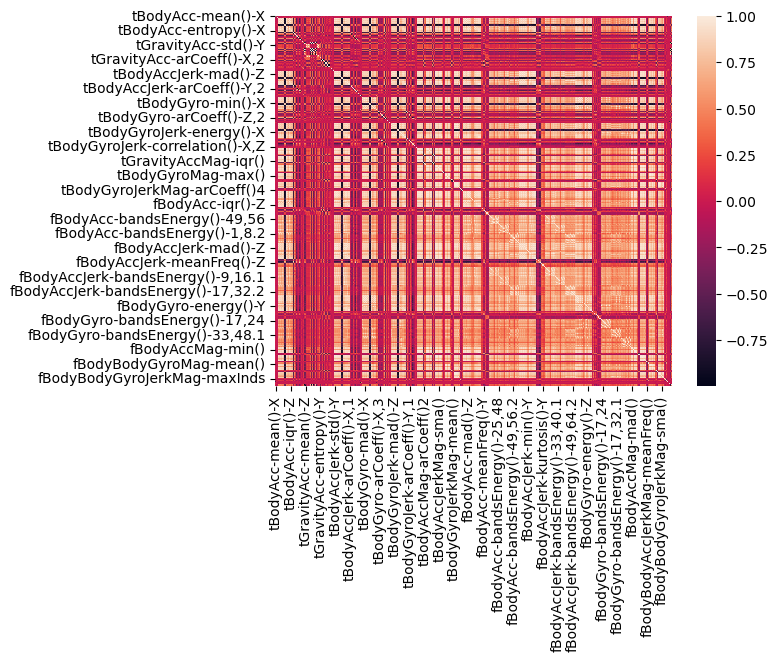

In [27]:
#drawing heatmap for these values
sns.heatmap(corr_values)

<Axes: ylabel='Count'>

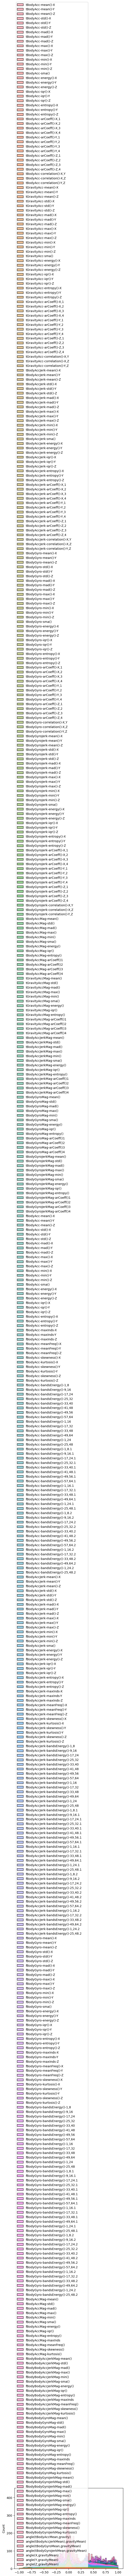

In [31]:
sns.histplot(corr_values, kde=True)

too many values, so eventually remove all those values

In [28]:
# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

In [29]:
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [30]:
# Make the unused values NaNs below the diagonal
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

In [32]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [33]:

    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [34]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


A histogram of the absolute value correlations.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

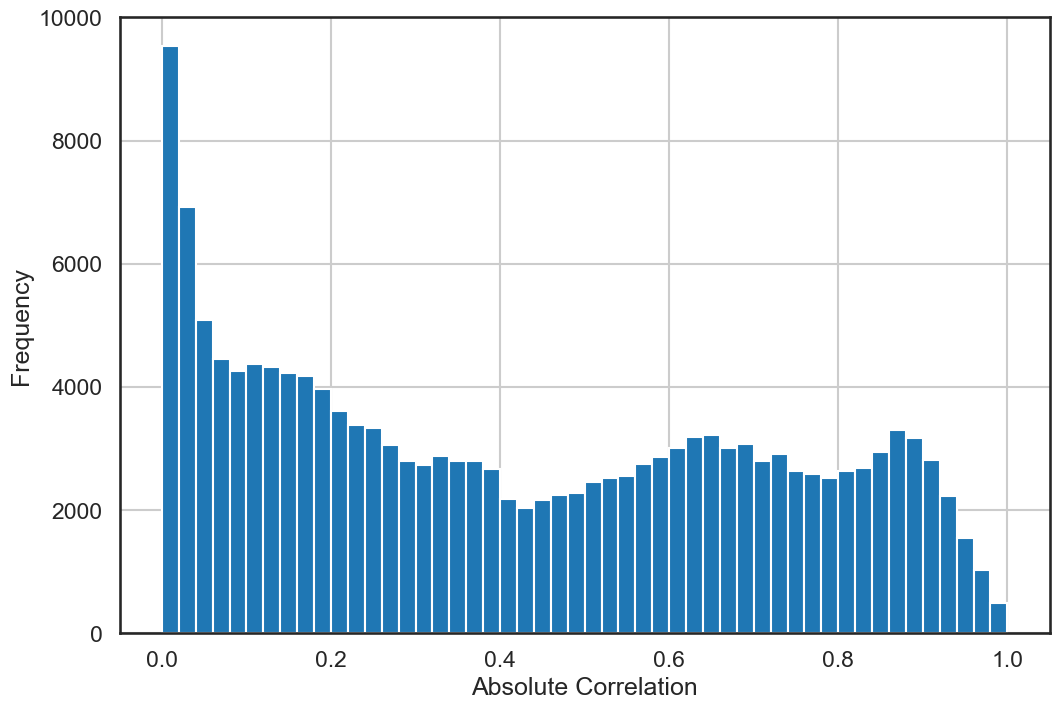

In [36]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [37]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [39]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)


train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

In [40]:
train_idx, test_idx

(array([1575, 1707, 6425, ..., 3037, 3002,  996], dtype=int64),
 array([7743,  969, 3175, ..., 8914, 8756, 1470], dtype=int64))

In [41]:

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [42]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [43]:
y_test.value_counts(normalize=True)
### END SOLUTION

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

## Question 4

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [44]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [45]:
from sklearn.linear_model import LogisticRegressionCV
#cross validation
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [46]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Question 5

*   Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [47]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
29  -0.072718  0.144341 -0.006495 -0.140439  0.239441 -0.164803 -0.416176   
186 -0.024311  2.870211 -2.545992 -0.149185 -0.339042  0.772965  0.000000   
277  0.086075 -0.250780  0.147541  0.204380 -0.259073  0.084205  0.192930   
301  0.227646 -0.207437  0.494148 -0.050540  0.258659 -0.065982  0.063396   
496 -0.026256  0.038503  0.214899  0.001144 -0.055611  0.109863  0.000000   
512  0.056955  0.387114 -0.145602  0.129768 -0.647183  0.011195  0.000000   
273 -0.011360 -0.070934 -0.364104 -0.036201 -0.075844  0.341680  0.000000   
559 -0.374313 -0.740397  1.771455 -0.242904 -0.275139  0.876728 -1.020097   
195 -0.114347 -0.349342  0.270734 -0.312582  0.388129 -0.001026 -0.204061   
339 -0.003917  0.203405  0.164710 -0.085979  0.083657 -0.026651 -0.030123   

                                                        l2            \
            1         2    3         4         5         0         1   
29   0.000000  0.000000  0.0  0.000000  0.000000 -0.137149  1.792612   
186  9.235953 -8.582887  0.0 -0.272190  4.585369 -0.008509  9.315007   
277  0.000000  0.000000  0.0 -0.615886  0.065488  0.152546  0.540516   
301  0.000000  0.865386  0.0  0.171388  0.000000  0.517446  0.907856   
496  0.000000  0.000000  0.0  0.000000  0.000000 -0.053952  0.004764   
512  0.453625  0.000000  0.0 -1.089626  0.000000  0.194190  1.516796   
273  0.000000 -0.125528  0.0  0.000000  0.000000 -0.002079  0.134274   
559  0.000000  0.000000  0.0  0.000000  1.547056 -0.543058  2.940478   
195 -2.761999  2.164498  0.0  0.000000  0.000000 -0.251373 -4.401608   
339  0.000000  0.000131  0.0  0.004338  0.007316 -0.027977  0.667977   

                                             
            2         3         4         5  
29  -0.168258 -0.355067  0.427747 -0.170114  
186 -3.823702 -0.339356 -0.770420  1.864792  
277  0.189939  0.477128 -0.548110  0.177178  
301  0.532730 -0.140688  0.636719 -0.378895  
496  0.349450  0.069499 -0.087497  0.063176  
512 -0.293099 -0.163929 -1.177178  0.163790  
273 -0.568498 -0.046639 -0.075918  0.661113  
559  2.219873 -0.940631 -0.660476  2.024948  
195  0.998659 -0.657635  0.605733  0.025504  
339  0.200124 -0.192749  0.071236 -0.135859

Prepare six separate plots for each of the multi-class coefficients.


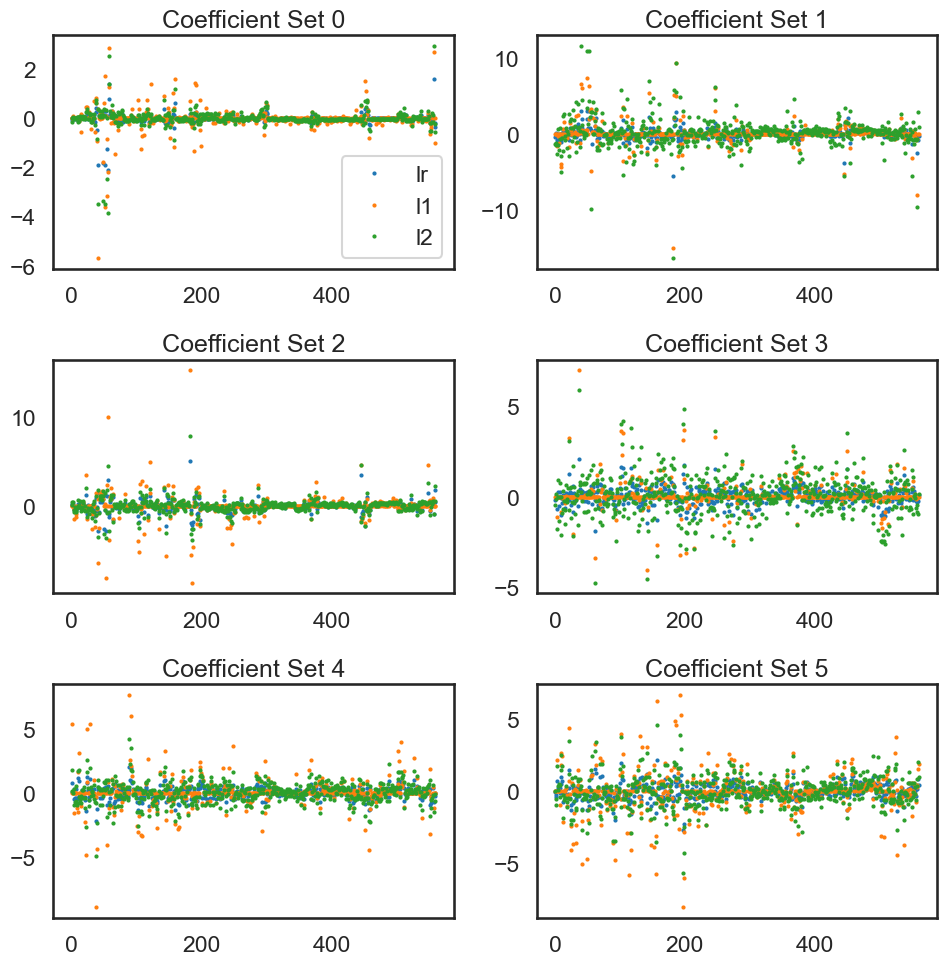

In [48]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

## Question 6

*   Predict and store the class for each model.
*   Store the probability for the predicted class for each model.


In [49]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [50]:
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.998939,0.999013,0.999757
1,0.988165,0.999776,0.999477
2,0.987592,0.995718,0.999670
3,0.981381,0.999194,0.994337
4,0.998277,0.999924,0.999997


## Question 7

For each model, calculate the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [51]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [52]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.983835,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983815,0.983819
accuracy,0.984142,0.983819,0.983819
auc,0.990384,0.990144,0.990165


## Question 8

*   Display or plot the confusion matrix for each model.


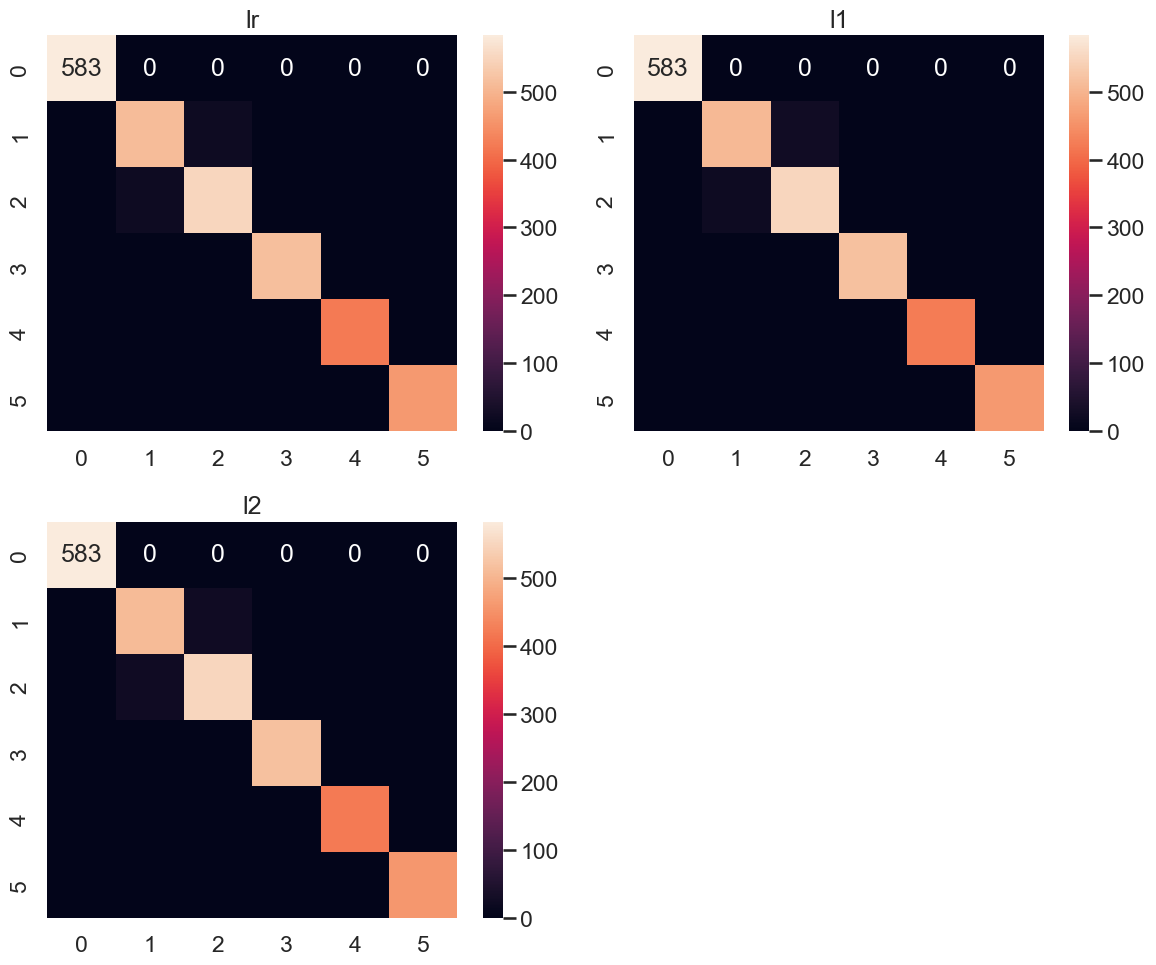

In [57]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

***

### Machine Learning Foundation (C) 2020 IBM Corporation
